In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

COVID-19-models.ipynb     china-covid19-data.zip    covid19-in-usa/
Covid-19-China.ipynb      coronavirus-in-italy/     covid19-in-usa.zip
Covid-19-US.ipynb         coronavirus-in-italy.zip  covid19_data.csv
china-covid19-data/       coronavirusdataset/


In [3]:
cd covid19-in-usa/

/Users/jinbiao.ji/mygithub/MLTSA_JJi/midterm/covid19-in-usa


In [4]:
ls

us_covid19_daily.csv         us_states_covid19_daily.csv


In [49]:
c19_all_us = pd.read_csv('us_covid19_daily.csv')

In [50]:
c19_all_us['date'] = pd.to_datetime(c19_all_us['date'], format='%Y%m%d')

In [51]:
c19_all_us.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-28,56,1005592,4790136.0,4206.0,54940.0,106265.0,9491.0,3798.0,4760.0,...,52525.0,106265.0,5799934,5795728,5795728,2198.0,8483.0,177775.0,24458.0,202233.0
1,2020-04-27,56,981134,4612361.0,4077.0,54971.0,97782.0,9655.0,3720.0,4867.0,...,50327.0,97782.0,5597572,5593495,5593495,1163.0,1972.0,168567.0,21876.0,190443.0
2,2020-04-26,56,959258,4443794.0,4445.0,55030.0,95810.0,14831.0,2571.0,5121.0,...,49164.0,95810.0,5407497,5403052,5403052,1095.0,1067.0,179387.0,27016.0,206403.0
3,2020-04-25,56,932242,4264407.0,5315.0,56344.0,94743.0,15020.0,2516.0,5266.0,...,48069.0,94743.0,5201964,5196649,5196649,1818.0,1377.0,235320.0,35936.0,271256.0
4,2020-04-24,56,896306,4029087.0,4396.0,56075.0,93366.0,15078.0,2468.0,5187.0,...,46251.0,93366.0,4929789,4925393,4925393,1866.0,2258.0,197707.0,34518.0,232225.0


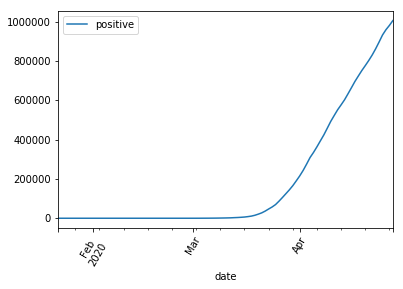

In [52]:
pd.plotting.register_matplotlib_converters()
c19_all_us.plot(x='date',y='positive',rot = 60)

In [53]:
c19_all_us['date'].iloc[-1]

Timestamp('2020-01-22 00:00:00')

### Daily Increase

(18283, 18392)

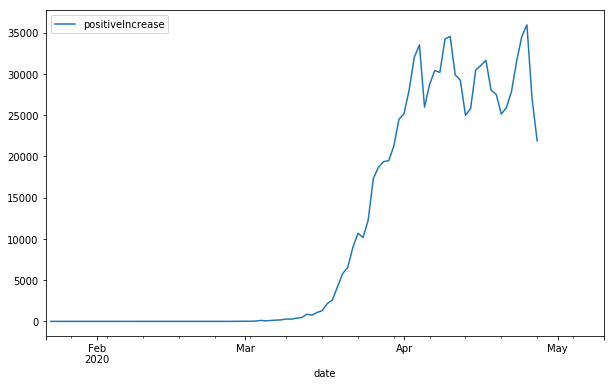

In [54]:
fig,ax=plt.subplots(figsize=(10,6))
c19_all_us[1:].plot(x='date',y='positiveIncrease',ax=ax)
ax.set_xlim(c19_all_us['date'].iloc[-1], pd.Timestamp('2020-05-10'))

### Step 1:

In [55]:
def func_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [56]:
from scipy.optimize import curve_fit

In [57]:
confirmed_data=c19_all_us[::-1].reset_index().rename(columns={'date':'ds','positive':'y'})
confirmed_data.tail()


,index,ds,states,y,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
93,4,2020-04-24,56,896306,4029087.0,4396.0,56075.0,93366.0,15078.0,2468.0,...,46251.0,93366.0,4929789,4925393,4925393,1866.0,2258.0,197707.0,34518.0,232225.0
94,3,2020-04-25,56,932242,4264407.0,5315.0,56344.0,94743.0,15020.0,2516.0,...,48069.0,94743.0,5201964,5196649,5196649,1818.0,1377.0,235320.0,35936.0,271256.0
95,2,2020-04-26,56,959258,4443794.0,4445.0,55030.0,95810.0,14831.0,2571.0,...,49164.0,95810.0,5407497,5403052,5403052,1095.0,1067.0,179387.0,27016.0,206403.0
96,1,2020-04-27,56,981134,4612361.0,4077.0,54971.0,97782.0,9655.0,3720.0,...,50327.0,97782.0,5597572,5593495,5593495,1163.0,1972.0,168567.0,21876.0,190443.0
97,0,2020-04-28,56,1005592,4790136.0,4206.0,54940.0,106265.0,9491.0,3798.0,...,52525.0,106265.0,5799934,5795728,5795728,2198.0,8483.0,177775.0,24458.0,202233.0


In [58]:
c19_all_us[::-1]['positive'].values

array([      1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       9,      18,      40,      53,      94,
           207,     275,     387,     538,     721,    1013,    1280,
          1672,    2142,    3004,    3759,    4843,    6130,    8288,
         10865,   15063,   20840,   27372,   36334,   47013,   57179,
         69473,   86789,  105462,  124815,  144297,  165521,  189998,
        215177,  243235,  275234,  308752,  334718,  363465,  393874,
        424045,  458260,  492806,  522687,  551906,  576875,  602668,
        633112,  664129,  695761,  723776,  751287,  776419,  802330,
        830223,  861788,  896306,  932242,  959258,  981134, 1005592])

In [59]:
# Randomly initialize the coefficients
p0 = np.random.exponential(size=3)

# Set min bound 0 on all coefficients, and set different max bounds # for each coefficient
bounds = (0, [100000., 1000., 1000000000.])

# Convert pd.Series to np.Array and use Scipy's curve fit to find   # the best Nonlinear Least Squares coefficients
x = np.array(c19_all_us.index.values)+1
y = np.array(c19_all_us[::-1]['positive'].values)

(a,b,c),cov = curve_fit(func_logistic, 
                              x, y, bounds=bounds, p0=p0, maxfev=1000000)
t_fastest = np.log(a) / b
i_fastest = func_logistic(t_fastest, a, b, c)
                

In [60]:
res_df = c19_all_us[1:]['date'].copy()
res_df['fastest_grow_day'] = t_fastest
res_df['fastest_grow_value'] = i_fastest
res_df['growth_stabilized'] = t_fastest <= x[-1]
res_df['timestep'] = x
res_df['res_func_logistic'] = func_logistic(x, a, b, c)


if t_fastest <= x[-1]:
    print('Growth stabilized: US.','| Fastest grow day:', t_fastest, '| Infections:', i_fastest)
    res_df['cap'] = func_logistic(x[-1] + 10, a, b, c)
else:
    print('Growth increasing: US,',  '| Fastest grow day:', t_fastest, '| Infections:', i_fastest)
    res_df['cap'] = func_logistic(i_fastest + 10, a, b, c)

Growth stabilized: US. | Fastest grow day: 81.78254029395104 | Infections: 536649.7265307964


In [61]:
res_df['cap']

1042042.9923770427

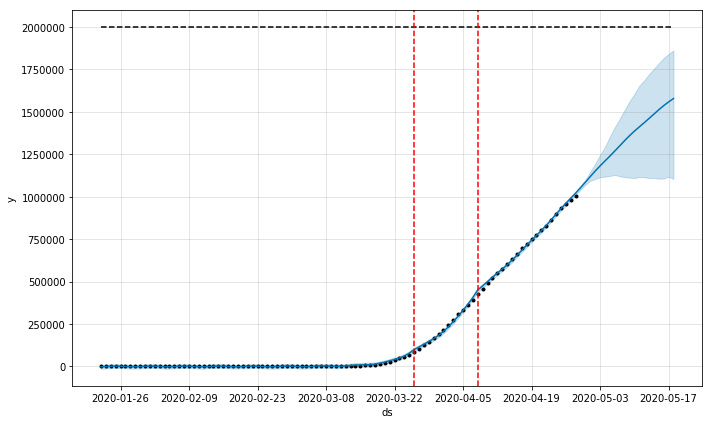

In [64]:
m = Prophet(growth='logistic',interval_width=0.95,n_changepoints=6,
            yearly_seasonality=False,
            weekly_seasonality = True,
            daily_seasonality = False,
           changepoint_prior_scale=1)

confirmed_data['cap'] = 2000000
m.fit(confirmed_data)
future = m.make_future_dataframe(periods=20)
future['cap'] = 2000000
forecast = m.predict(future)
fig5 = m.plot(forecast)

add_changepoints_to_plot(fig5.gca(), m, forecast,trend=False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[]

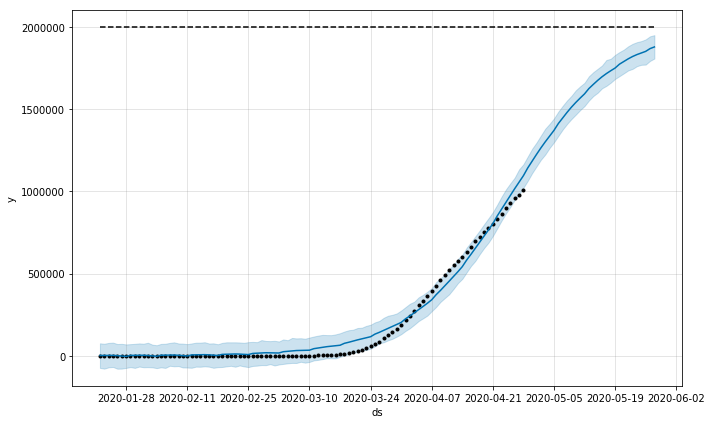

In [65]:
m2 = Prophet(growth='logistic',interval_width=0.95,n_changepoints=6)
confirmed_data['cap'] = 2000000
m2.fit(confirmed_data)
future = m2.make_future_dataframe(periods=30)
future['cap'] = 2000000
forecast = m2.predict(future)
fig6 = m2.plot(forecast)

add_changepoints_to_plot(fig6.gca(), m2, forecast,trend=False)

In [31]:
from fbprophet import Prophet, diagnostics
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, add_changepoints_to_plot, plot_plotly

In [32]:
def rchi2(y, ytrue):
    return ((y - ytrue)**2).sum() / len(y)

In [179]:
cvresult_m = cross_validation(m, horizon = '2 days')

INFO:fbprophet:Making 23 forecasts with cutoffs between 2020-03-11 00:00:00 and 2020-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number of observations.Usin

In [157]:
cvresult_m.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
41,2020-04-02,272390.657317,264014.667745,280006.830059,239099.0,2020-03-31
42,2020-04-02,260591.295789,251256.134650,270036.836990,239099.0,2020-04-01
43,2020-04-03,303503.434962,293939.306781,312592.756496,271988.0,2020-04-01
44,2020-04-03,292087.071525,281149.375740,302081.344909,271988.0,2020-04-02
45,2020-04-04,335410.627400,325586.162490,345508.924113,305755.0,2020-04-02


In [155]:
print('Reduced Chi square is {}.'.format(rchi2(cvresult_m.yhat, 
                                               cvresult_m.y)))

Reduced Chi square is 216855992.05798617.


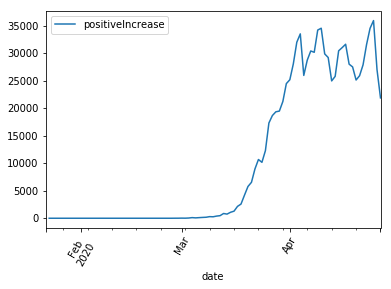

In [33]:
c19_all_us[1:].plot(x='date',y='positiveIncrease',rot = 60)

In [160]:
cvresult_m2 = cross_validation(m2, horizon = '2 days')

INFO:fbprophet:Making 23 forecasts with cutoffs between 2020-03-11 00:00:00 and 2020-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
/Users/jinbiao.ji/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
/Users/jinbiao.ji/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
/Users/jinbiao.ji/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.f